# Step 1: Read Images from Directory

In [66]:
import cv2 
import os 
import glob 
img_dir = "C:\\Users\\engrh\\Deep Learning (MS)\\images" # Enter Directory of all images  
data_path = os.path.join(img_dir,'*g') 
files = glob.glob(data_path) 
data = [] 
for f1 in files: 
    img = cv2.imread(f1) 
    data.append(img) 

# Step 2: Read Labels from CSV file

In [67]:
import pandas as pd
import numpy as np
labels = pd.read_csv("labels.csv")
labels = np.array(labels)
labels.shape

(20, 1)

# Step 3: Prepare the Data

- Convert the data into NumPy array

In [68]:
import numpy as np
data = np.array(data)
print(type(data))
print(data.shape)

<class 'numpy.ndarray'>
(20, 300, 300, 3)


- Flatten and reshape the data

In [69]:
data = data.flatten().reshape(20, 270000)
print(data.shape)

(20, 270000)


- Save data as X and labels as y

In [70]:
X = data
y = labels

# Step 4: Split the data into train and test

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [72]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16, 270000)
(4, 270000)
(16, 1)
(4, 1)


# Step 5: KNN from Scratch

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib import rcParams
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

In [74]:
class KNN:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None
        
    @staticmethod
    def _euclidean_distance(p, q):
        return np.sqrt(np.sum((p - q) ** 2))
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def predict(self, X):
        predictions = []
        for p in X:
            euc_distances = [self._euclidean_distance(p, q) for q in self.X_train]
            sorted_k = np.argsort(euc_distances)[:self.k]
            k_nearest = [self.y_train[y] for y in sorted_k]
            predictions.append(stats.mode(k_nearest)[0][0])
            
        return np.array(predictions)

# Step 6: Prediction

In [75]:
model = KNN()
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [76]:
preds

array([[0],
       [1],
       [1],
       [0]], dtype=int64)

# Step 7: Accuracy

In [77]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, preds)

0.5

# Step 8: Confusion Matrix

Text(0.5, 1.0, 'Accuracy Score: 0.5')

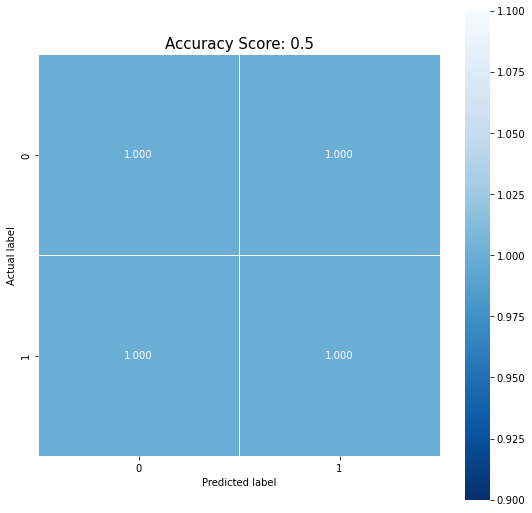

In [78]:
# to create nice confusion metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,preds)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,preds))
plt.title(all_sample_title,size=15)